In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
def return_full_spec(data_fn, wl_fn):
    hyperbb_data = pd.read_csv(data_fn)
    wl = np.genfromtxt(wl_fn, delimiter=',')
    
    del hyperbb_data['dt']
    del hyperbb_data['ScanIdx']
    del hyperbb_data['WaterTemp']
    del hyperbb_data['Depth']
    
    hyperbb_data.columns=wl.astype(str)
    
    return(hyperbb_data.to_numpy(), wl)

In [121]:
def return_med_spec(data_fn, wl_fn):
    hyperbb_data = pd.read_csv(data_fn)
    wl = np.genfromtxt(wl_fn, delimiter=',')
    
    del hyperbb_data['dt']
    del hyperbb_data['ScanIdx']
    del hyperbb_data['WaterTemp']
    del hyperbb_data['Depth']
    
    hyperbb_data.columns=wl.astype(str)
        
    med_bbspec = np.nanmedian(hyperbb_data.to_numpy(),axis=0)
    std_bbspec = np.nanstd(hyperbb_data.to_numpy(),axis=0)
    
    return(med_bbspec, std_bbspec, wl)

In [122]:
air_zero_med_bbspec, air_zero_std_bbspec, air_zero_wl = return_med_spec('data/hyper_bb_zero_air_processed_210722.csv', 'data/hyper_bb_zero_air_lambda_processed_210722.csv')
water_zero_med_bbspec, water_zero_std_bbspec, water_zero_wl = return_med_spec('data/hyper_bb_zero_water_processed_210722.csv', 'data/hyper_bb_lambda_zero_water_processed_210722.csv')

sample_med_bbspec, sample_std_bbspec, sample_wl = return_med_spec('data/hyper_bb_sample_processed_210722.csv', 'data/hyper_bb_lambda_sample_processed_210722.csv')

In [123]:
sample_full_bbspec, sample_wl = return_full_spec('data/hyper_bb_sample_processed_210722.csv', 'data/hyper_bb_lambda_sample_processed_210722.csv')

(-0.1, 0.1)

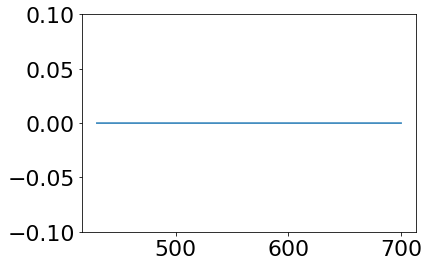

In [124]:
plt.plot(sample_wl, air_zero_med_bbspec)
plt.ylim(-0.1,0.1)

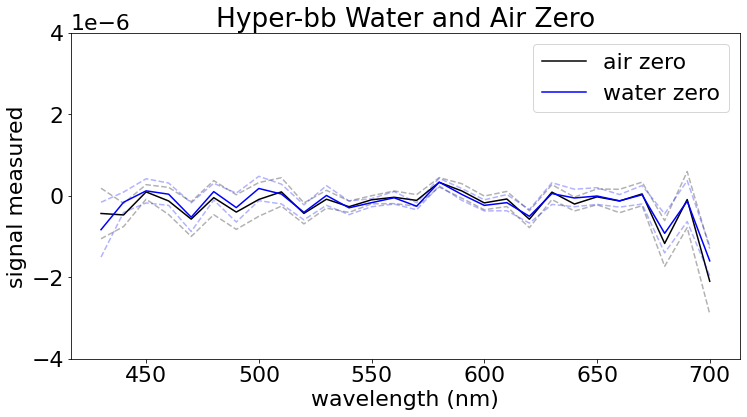

In [182]:
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(sample_wl, air_zero_med_bbspec, c='black', label='air zero')
ax.plot(sample_wl, air_zero_med_bbspec+air_zero_std_bbspec, c='black', linestyle='--', alpha=0.3)
ax.plot(sample_wl, air_zero_med_bbspec-air_zero_std_bbspec, c='black', linestyle='--', alpha=0.3)

ax.plot(sample_wl, water_zero_med_bbspec, c='blue', label='water zero')
ax.plot(sample_wl, water_zero_med_bbspec+water_zero_std_bbspec, c='blue', linestyle='--', alpha=0.3)
ax.plot(sample_wl, water_zero_med_bbspec-water_zero_std_bbspec, c='blue', linestyle='--', alpha=0.3)

ax.set_ylim(-0.000004, 0.000004)
ax.set_ylabel('signal measured')
ax.set_xlabel('wavelength (nm)')
ax.legend()

ax.set_title('Hyper-bb Water and Air Zero')

fig.savefig('hyperbb_water_air_zero.png')

Correct Hyper bb 

In [171]:
import math

In [180]:
beta_sw

array([4.19914205e-04, 3.80658657e-04, 3.45917505e-04, 3.15076466e-04,
       2.87617525e-04, 2.63101904e-04, 2.41156383e-04, 2.21462239e-04,
       2.03746267e-04, 1.87773434e-04, 1.73340868e-04, 1.60272880e-04,
       1.48416858e-04, 1.37639842e-04, 1.27825670e-04, 1.18872578e-04,
       1.10691189e-04, 1.03202806e-04, 9.63379773e-05, 9.00352644e-05,
       8.42402013e-05, 7.89044001e-05, 7.39847848e-05, 6.94429336e-05,
       6.52445101e-05, 6.13587733e-05, 5.77581525e-05, 5.44178774e-05])

In [231]:
beta_sw = np.genfromtxt('data/betasw_hyperbb.csv', delimiter=',')

# note no correction factor here
b_theta = sample_med_bbspec - water_zero_med_bbspec
# correction based on 20.4 C, 31 ppt and some matlab code
b_theta_p = b_theta - beta_sw

# not correcting for abs or scat from ACS at the moment
L = .0391 #(m)
bp_corr = b_theta_p * math.e**(L*(interp_acs_a+.4*interp_acs_b))

# convert particulate VSF to particulate Bb

bbp = 2*math.pi * 1.16 * bp_corr

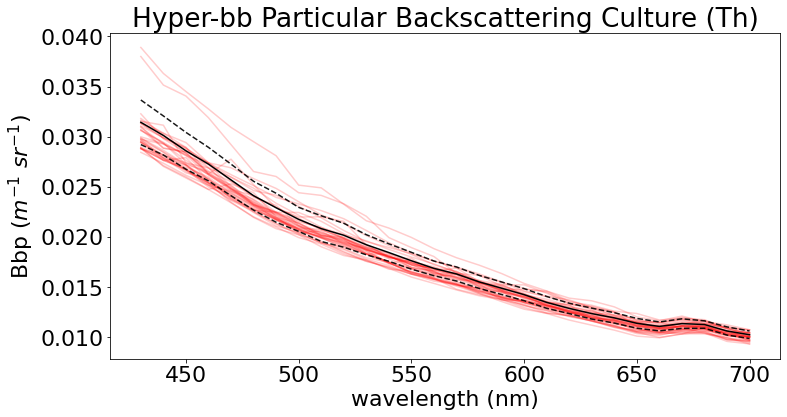

In [232]:
fig, ax = plt.subplots(figsize=(12,6))


for i in range(35):
    ax.plot(sample_wl, 2*math.pi * 1.16 * (sample_full_bbspec[i]- beta_sw), c='red', alpha=0.2)

ax.plot(sample_wl, bbp, c='black')
ax.plot(sample_wl, bbp+2*math.pi * 1.16 *sample_std_bbspec, c='black', linestyle='--', alpha=0.9)
ax.plot(sample_wl, bbp-2*math.pi * 1.16 *sample_std_bbspec, c='black', linestyle='--', alpha=0.9)

ax.set_title('Hyper-bb Particular Backscattering Culture (Th)')
#ax.set_ylim(0,0.005)

ax.set_ylabel('Bbp ($m^{−1}$ $sr^{−1}$)')
ax.set_xlabel('wavelength (nm)')

# ax.plot(air_zero_med_bbspec)
# ax.plot(air_zero_med_bbspec+air_zero_std_bbspec)
# ax.plot(air_zero_med_bbspec-air_zero_std_bbspec)
#plt.ylim(-0.1,0.1)

fig.savefig('hyperbb_culture_tha.png')

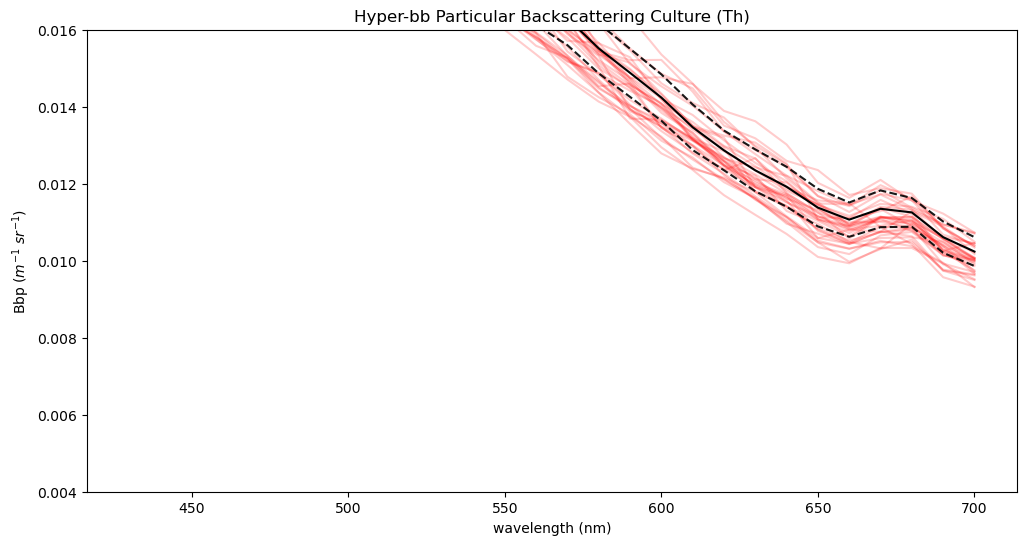

In [255]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12,6))


for i in range(35):
    ax.plot(sample_wl, 2*math.pi * 1.16 * (sample_full_bbspec[i]- beta_sw), c='red', alpha=0.2)

ax.plot(sample_wl, bbp, c='black')
ax.plot(sample_wl, bbp+2*math.pi * 1.16 *sample_std_bbspec, c='black', linestyle='--', alpha=0.9)
ax.plot(sample_wl, bbp-2*math.pi * 1.16 *sample_std_bbspec, c='black', linestyle='--', alpha=0.9)

ax.set_title('Hyper-bb Particular Backscattering Culture (Th)')
ax.set_ylim(0.004,0.016)

ax.set_ylabel('Bbp ($m^{−1}$ $sr^{−1}$)')
ax.set_xlabel('wavelength (nm)')

# ax.plot(air_zero_med_bbspec)
# ax.plot(air_zero_med_bbspec+air_zero_std_bbspec)
# ax.plot(air_zero_med_bbspec-air_zero_std_bbspec)
#plt.ylim(-0.1,0.1)

fig.savefig('hyperbb_culture_tha.png')

Text(0.5, 0, 'wavelength (nm)')

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


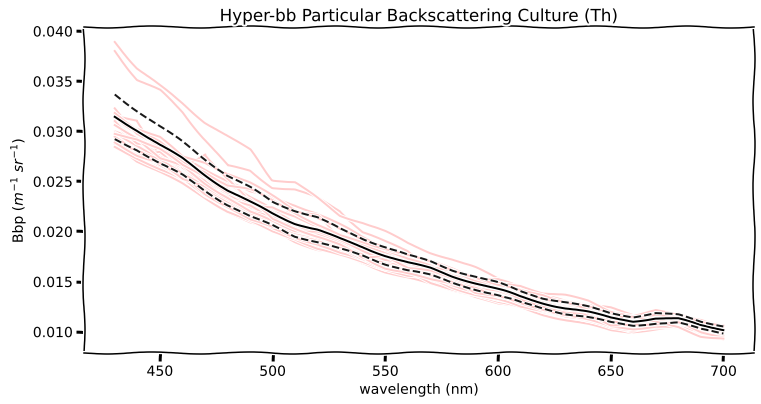

In [247]:
plt.xkcd()

fig, ax = plt.subplots(figsize=(12,6))


for i in range(35):
    ax.plot(sample_wl, 2*math.pi * 1.16 * (sample_full_bbspec[i]- beta_sw), c='red', alpha=0.2)

ax.plot(sample_wl, bbp, c='black')
ax.plot(sample_wl, bbp+2*math.pi * 1.16 *sample_std_bbspec, c='black', linestyle='--', alpha=0.9)
ax.plot(sample_wl, bbp-2*math.pi * 1.16 *sample_std_bbspec, c='black', linestyle='--', alpha=0.9)

ax.set_title('Hyper-bb Particular Backscattering Culture (Th)')
#ax.set_ylim(0,0.005)

ax.set_ylabel('Bbp ($m^{−1}$ $sr^{−1}$)')
ax.set_xlabel('wavelength (nm)')

# ax.plot(air_zero_med_bbspec)
# ax.plot(air_zero_med_bbspec+air_zero_std_bbspec)
# ax.plot(air_zero_med_bbspec-air_zero_std_bbspec)
#plt.ylim(-0.1,0.1)

#fig.savefig('hyperbb_culture_tha.png')

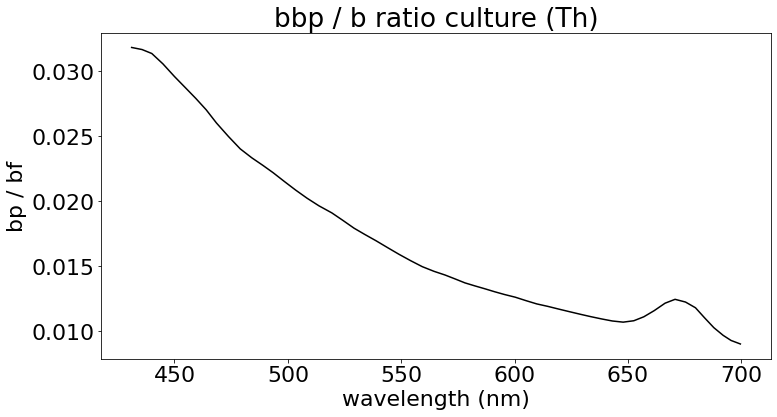

In [214]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(acs_lambda[7:-16],interp_hyperbb_bbp/acs_b_tha[7:-16],c='black')

#ax.set_ylim(0,0.01)
ax.set_title('bbp / b ratio culture (Th)')

ax.set_ylabel('bp / bf')
ax.set_xlabel('wavelength (nm)')

# ax.plot(air_zero_med_bbspec)
# ax.plot(air_zero_med_bbspec+air_zero_std_bbspec)
# ax.plot(air_zero_med_bbspec-air_zero_std_bbspec)
#plt.ylim(-0.1,0.1)
fig.savefig('bbp_to_bfp.png')

In [239]:
?trapz

Signature: trapz(y, x=None, dx=1.0, axis=-1)
Docstring:
Integrate along the given axis using the composite trapezoidal rule.

Integrate `y` (`x`) along given axis.

Parameters
----------
y : array_like
    Input array to integrate.
x : array_like, optional
    The sample points corresponding to the `y` values. If `x` is None,
    the sample points are assumed to be evenly spaced `dx` apart. The
    default is None.
dx : scalar, optional
    The spacing between sample points when `x` is None. The default is 1.
axis : int, optional
    The axis along which to integrate.

Returns
-------
trapz : float
    Definite integral as approximated by trapezoidal rule.

See Also
--------
sum, cumsum

Notes
-----
Image [2]_ illustrates trapezoidal rule -- y-axis locations of points
will be taken from `y` array, by default x-axis distances between
points will be 1.0, alternatively they can be provided with `x` array
or with `dx` scalar.  Return value will be equal to combined area under
the red lines

In [244]:
trapz(y=bbp, x=sample_wl, dx=.1)

4.8158408937224335

In [241]:
simps(y=bbp, x=sample_wl, dx=1)

4.815059624655855

In [233]:
from scipy.integrate import simps
from numpy import trapz

# The y values.  A numpy array is used here,
# but a python list could also be used.
y = np.array([5, 20, 4, 18, 19, 18, 7, 4])

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=5)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=5)
print("area =", area)

area = 452.5
area = 460.0


In [219]:
acs_b_tha =  np.genfromtxt('data/b_tha.csv', delimiter=',')
acs_a_tha =  np.genfromtxt('data/a_tha.csv', delimiter=',')
acs_lambda = np.genfromtxt('data/wavelength.csv', delimiter=',')

In [220]:
fb_acs_to_hbb = interpolate.interp1d(acs_lambda, acs_b_tha)

In [221]:
fa_acs_to_hbb = interpolate.interp1d(acs_lambda, acs_a_tha)

In [222]:
interp_acs_b = fb_acs_to_hbb(sample_wl)
interp_acs_a = fa_acs_to_hbb(sample_wl)

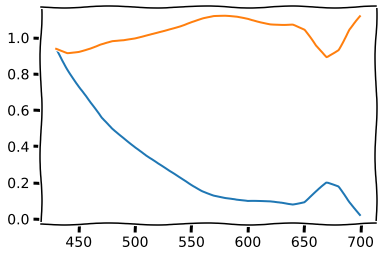

In [248]:
plt.plot(sample_wl, interp_acs_a)
plt.plot(sample_wl, interp_acs_b)

In [203]:
from scipy import interpolate
f = interpolate.interp1d(sample_wl, bbp)

interp_hyperbb_bbp = f(acs_lambda[7:-16])

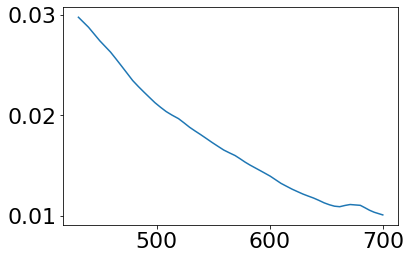

In [204]:
plt.plot(acs_lambda[7:-16], interp_hyperbb_bbp)

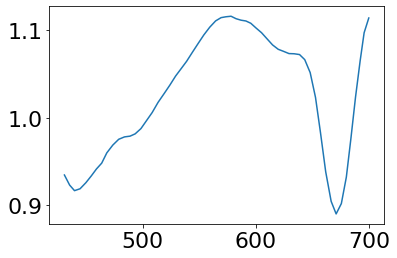

In [205]:
plt.plot(acs_lambda[7:-16], acs_b_tha[7:-16])

In [209]:
interp_hyperbb_bbp

array([0.0297354 , 0.02922165, 0.02874141, 0.02807769, 0.02738689,
       0.02681746, 0.02627176, 0.0256227 , 0.02497258, 0.024198  ,
       0.02343459, 0.02282757, 0.02227757, 0.02178642, 0.0212343 ,
       0.02078138, 0.02035088, 0.01999494, 0.01964556, 0.01923269,
       0.01878496, 0.0184263 , 0.01805832, 0.01766558, 0.01727586,
       0.01689995, 0.01652204, 0.0162306 , 0.01597399, 0.01566302,
       0.01532107, 0.01502375, 0.01475456, 0.01449042, 0.01422352,
       0.01392159, 0.01356739, 0.01320566, 0.01291488, 0.01262156,
       0.01237654, 0.01213901, 0.01194536, 0.01174659, 0.01151992,
       0.01126514, 0.0110721 , 0.01093406, 0.01088256, 0.01101041,
       0.01109913, 0.01105784, 0.01101836, 0.01078311, 0.01053123,
       0.01033202, 0.01020916, 0.01006525])

In [208]:
acs_b_tha[7:-16]

array([0.93477, 0.92326, 0.91691, 0.91906, 0.92594, 0.93372, 0.94172,
       0.9483 , 0.96003, 0.96892, 0.97552, 0.97824, 0.9791 , 0.98171,
       0.9877 , 0.99677, 1.006  , 1.0176 , 1.0283 , 1.0375 , 1.0477 ,
       1.0558 , 1.0645 , 1.0748 , 1.0847 , 1.0946 , 1.1034 , 1.1106 ,
       1.1143 , 1.1153 , 1.1159 , 1.1131 , 1.1114 , 1.1105 , 1.1079 ,
       1.1023 , 1.0971 , 1.0902 , 1.0832 , 1.0782 , 1.0758 , 1.0733 ,
       1.0731 , 1.0722 , 1.0664 , 1.0516 , 1.0233 , 0.98303, 0.93842,
       0.90473, 0.89037, 0.90217, 0.93235, 0.97606, 1.0236 , 1.0652 ,
       1.0971 , 1.1139 ])

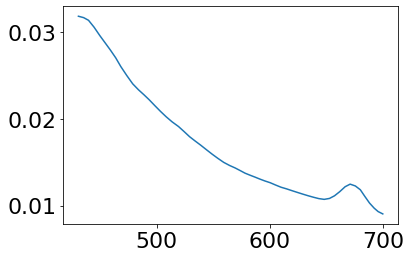

In [207]:
plt.plot(acs_lambda[7:-16],interp_hyperbb_bbp/acs_b_tha[7:-16])